In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
class_names = ['0', "1", "2", "3",
              "4", "5", "6", "7", "8",
              "9"]

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape, y_test.shape

((60000,), (10000,))

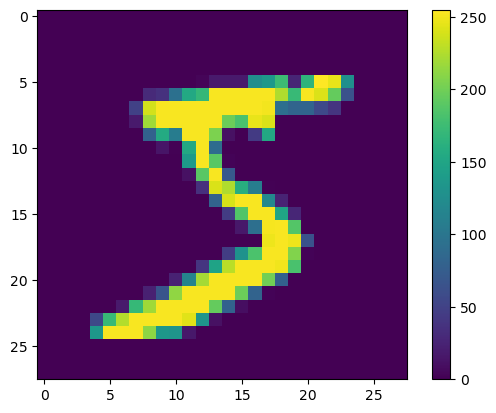

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

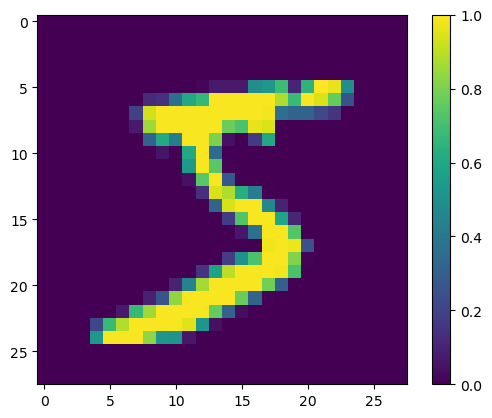

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

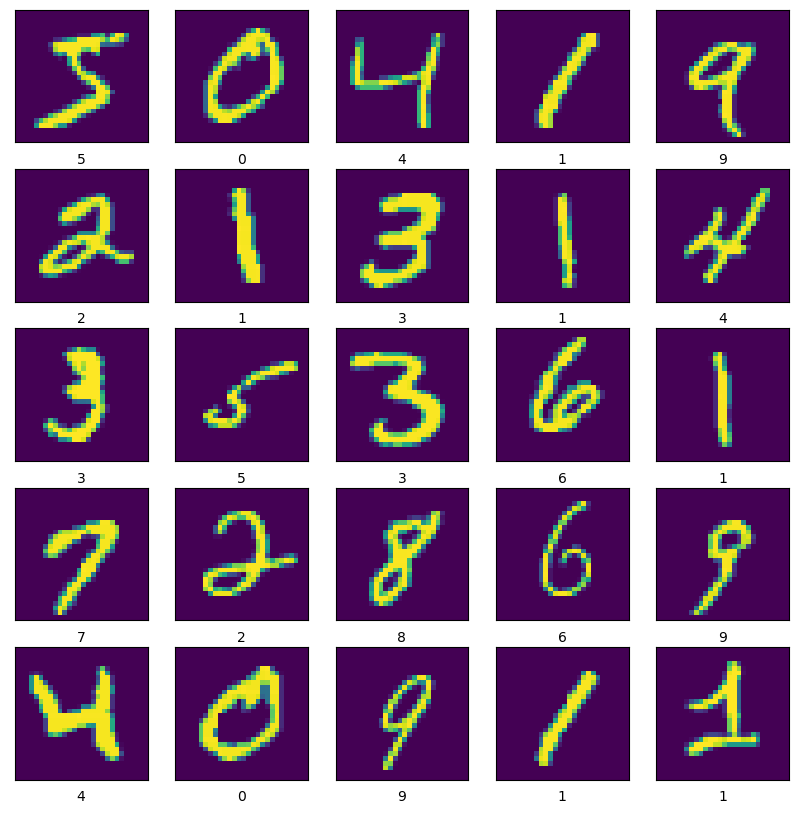

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

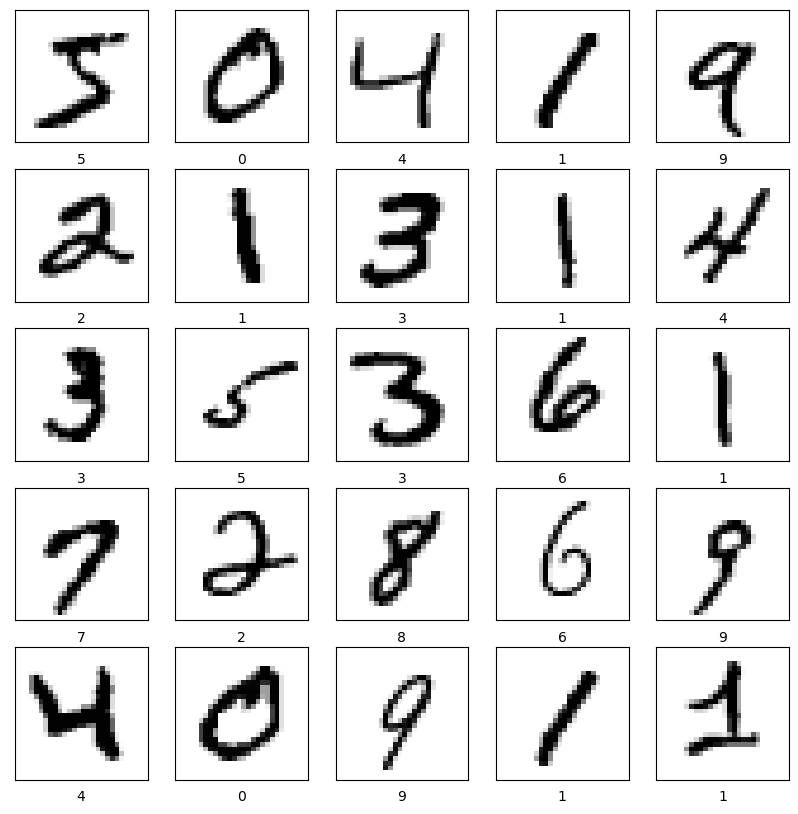

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])

In [12]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6598 - accuracy: 0.8323
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3416 - accuracy: 0.9043
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2924 - accuracy: 0.9178
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2614 - accuracy: 0.9267
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2375 - accuracy: 0.9333
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2181 - accuracy: 0.9389
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2021 - accuracy: 0.9437
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1886 - accuracy: 0.9478
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1769 - accuracy: 0.9505
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.166

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9525
Test accuracy: 0.9524999856948853


In [16]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [17]:
np.argmax(predictions[0])

5

In [18]:
y_train[0]

5

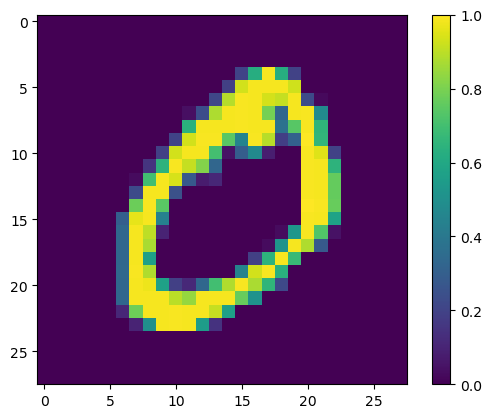

In [19]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [20]:
class_names[np.argmax(predictions[1])]

'0'

In [21]:
model.save('my_model.keras')

In [22]:
def recognize_digit(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    if img is None:
        print("Ошибка: изображение не загружено. Проверь путь к файлу!")
        return
    
    img = cv2.resize(img, (28, 28))  
    img = 255 - img  
    img = img / 255.0  
    img = img.reshape(1, 28, 28)  

    prediction = model.predict(img)  
    predicted_label = np.argmax(prediction)  

    plt.imshow(img.reshape(28, 28), cmap='gray')  
    plt.title(f'Predicted: {predicted_label}')
    plt.show()

    return predicted_label


In [23]:
# Распознаём цифру с изображения
recognize_digit("C:\\Users\\bikti\\Desktop\\Без имени.png")

NameError: name 'cv2' is not defined

Пытаюсь загрузить изображение из: C:\Users\bikti\Desktop\Fjeirf3434g.png
Изображение успешно загружено!
1/1 [==============================] - 0s 44ms/step


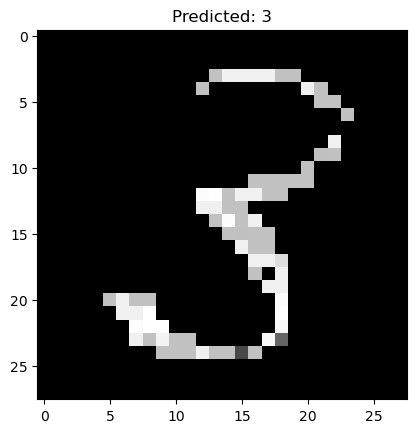

3

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Загрузите вашу модель, если она ещё не загружена
# model = load_model('path_to_your_model.h5')

def recognize_digit(image_path):
    print(f"Пытаюсь загрузить изображение из: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Ошибка: изображение не загружено. Проверь путь к файлу!")
        return
    
    print("Изображение успешно загружено!")
    img = cv2.resize(img, (28, 28))  
    img = 255 - img  
    img = img / 255.0  
    img = img.reshape(1, 28, 28)  

    prediction = model.predict(img)  
    predicted_label = np.argmax(prediction)  

    plt.imshow(img.reshape(28, 28), cmap='gray')  
    plt.title(f'Predicted: {predicted_label}')
    plt.show()

    return predicted_label

# Распознаём цифру с изображения
recognize_digit(r"C:\Users\bikti\Desktop\Fjeirf3434g.png")